In [29]:
import choix
import networkx as nx
import numpy as np

%matplotlib inline
np.set_printoptions(precision=3, suppress=True)

from sqlalchemy import create_engine
from sqlalchemy.orm import scoped_session, sessionmaker
from sqlalchemy import func
from app.db import Base, User, Annotation, Crop, Page, Record, Set, RecordCrop

if __name__ == "__main__":
    engine = create_engine('sqlite:///database.sqlite3',
                           convert_unicode=True,
                           connect_args={'check_same_thread': False})
    db_session = scoped_session(sessionmaker(autocommit=False,
                                             autoflush=False,
                                             bind=engine))
    Base.query = db_session.query_property()
    Base.metadata.create_all(bind=engine)

    #records_set_1 = Record.query.filter(Record.set_id == 1).all()
    records_set_3 = Record.query.filter(Record.set_id == 3).all()
    records_set_5 = Record.query.filter(Record.set_id == 5).all()
    
    records =  records_set_3 + records_set_5
    
    not_empty = []
    for i, item in enumerate(records):
        if len(item.annotations) > 0:
            not_empty.append(item)

    print(len(records), len(not_empty))

    prep_data = []
    set_ = set()
    for i, item in enumerate(not_empty):
        record_crop = RecordCrop.query.filter(RecordCrop.record_id == item.id).order_by(RecordCrop.order).all()
        _01 = 0
        _10 = 0
        for e, elem in enumerate(item.annotations):
            if elem.annotation == "01":
                _01 += 1
            else:
                _10 += 1
        if _01 > _10:
            prep_data.append([record_crop[0].crop_id, record_crop[1].crop_id])
            set_.add(record_crop[0].crop_id)
            set_.add(record_crop[1].crop_id)
        elif _01 < _10:
            prep_data.append([record_crop[1].crop_id, record_crop[0].crop_id])
            set_.add(record_crop[0].crop_id)
            set_.add(record_crop[1].crop_id)
    
    n_items = len(set_)
    set_ = sorted(list(set_))
    mapping = dict()
    for i in range(len(set_)):
        mapping[i] = set_[0]
        for e, elem in enumerate(prep_data):
            if elem[0] == set_[0]:
                elem[0] = i
            if elem[1] == set_[0]:
                elem[1] = i
        set_ = set_[1:]
    
    data = []
    
    for i, item in enumerate(prep_data):
        data.append((item[0], item[1]))

800 433


In [30]:
params = choix.ilsr_pairwise(n_items, data, 0.0001, max_iter=1000)
print(params)

[ 2.327 -0.058 -0.196  0.613 -4.64  -0.207 -0.264 -6.318 -1.756  0.99
 -0.343 -3.283 -1.01  -2.438 -3.415 -2.069 -7.333 -0.456 -2.054 -2.23
 -4.454 -4.941  2.341 -0.454  2.327  2.481 -0.605  2.736  2.248  2.956
  2.783 -4.09  -4.841 -2.334 -1.371 -0.165 -0.084 -2.479  2.343 -0.785
 -1.158  2.59   0.603  2.832 -1.45   0.417  2.341  2.944  1.173 -2.618
  2.139  3.15   1.01   3.231  3.508 -1.817  2.69   0.314 -3.039 -1.905
 -0.785 -1.347 -0.527 -3.066  0.263  2.341  2.106  2.456 -0.385  2.533
  1.368  3.327  2.341 -0.785 -0.785  1.974  2.553  1.705  1.666  2.454
 -2.448  0.263 -0.438  2.341  2.52   2.223 -0.593 -2.681  3.536  2.093
  2.341  2.595  2.126 -0.291  2.087  2.923  2.659  3.068  3.075  2.235
  2.237  2.978  3.154  2.341  1.228  0.704  2.341  2.54   3.487  2.017
 -1.041  2.345  3.353  0.72   1.137  3.551  2.097  2.341  0.263 -2.783
  1.901  2.341 -2.738  2.375 -2.57   2.12  -1.148 -7.228 -1.351 -0.683
 -0.785 -2.536  2.399  1.765  1.731  2.921  2.702 -0.688  3.092  2.905
  2.533 

In [34]:
hundred = []
for i, item in enumerate(np.argsort(params)):
    if i % 40 == 0:
        hundred.append(mapping[item])
    
    #print(mapping[item])
print(hundred)

[511, 487, 52, 239, 99, 113, 326, 404, 568, 251, 423, 133]


In [35]:
min_, max_ = min(params), max(params)
print(min_, max_)
for i, val in enumerate(params):
    params[i] = (val-min_) / (max_-min_)
    
print(params)

0.0 1.0
[ 0.889  0.71   0.7    0.76   0.366  0.699  0.695  0.24   0.583  0.789
  0.689  0.468  0.639  0.531  0.458  0.559  0.164  0.68   0.56   0.547
  0.38   0.344  0.89   0.68   0.889  0.901  0.669  0.92   0.883  0.936
  0.923  0.408  0.351  0.539  0.612  0.702  0.708  0.528  0.89   0.656
  0.628  0.909  0.76   0.927  0.606  0.746  0.89   0.935  0.802  0.518
  0.875  0.951  0.79   0.957  0.978  0.578  0.916  0.738  0.486  0.571
  0.656  0.613  0.675  0.484  0.734  0.89   0.872  0.899  0.686  0.904
  0.817  0.964  0.89   0.656  0.656  0.863  0.906  0.842  0.839  0.899
  0.531  0.734  0.682  0.89   0.904  0.881  0.67   0.513  0.98   0.871
  0.89   0.909  0.874  0.693  0.871  0.934  0.914  0.945  0.945  0.882
  0.882  0.938  0.951  0.89   0.807  0.767  0.89   0.905  0.976  0.866
  0.636  0.89   0.966  0.768  0.8    0.981  0.872  0.89   0.734  0.506
  0.857  0.89   0.509  0.893  0.522  0.873  0.628  0.172  0.613  0.663
  0.656  0.524  0.894  0.847  0.844  0.934  0.917  0.663  0.946  0.93

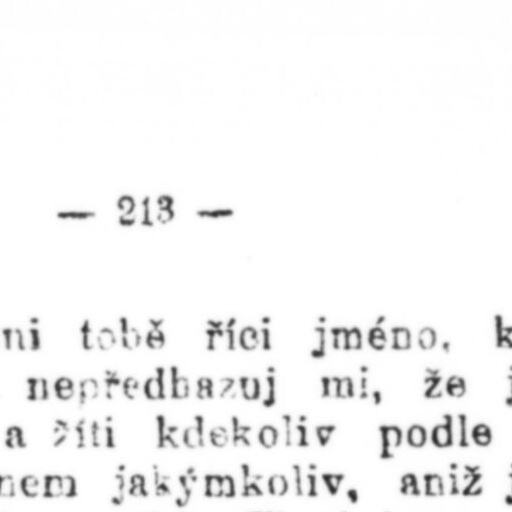

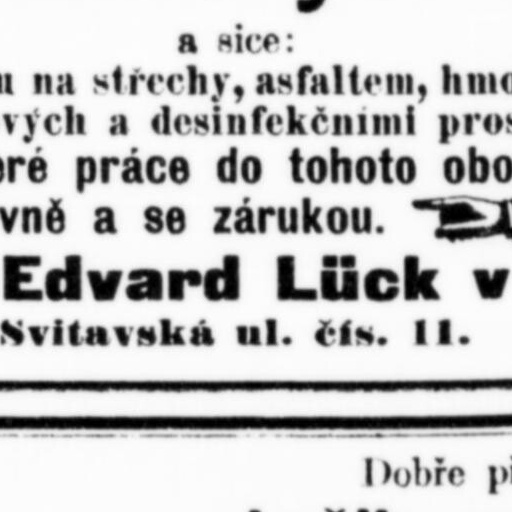

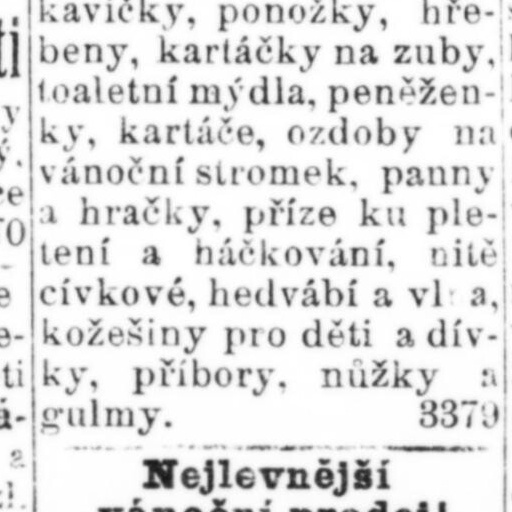

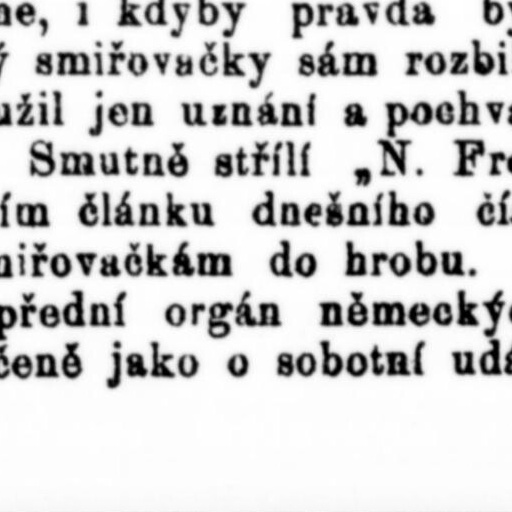

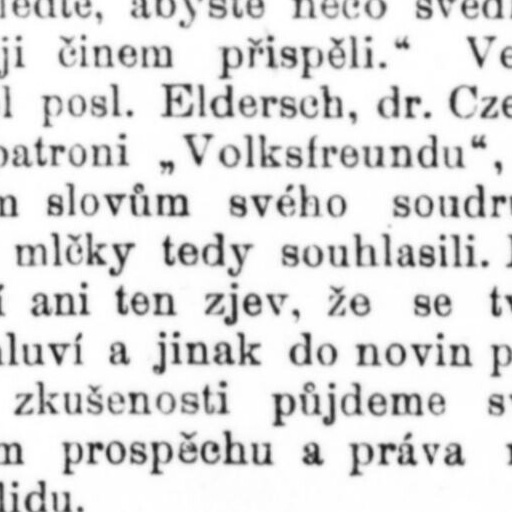

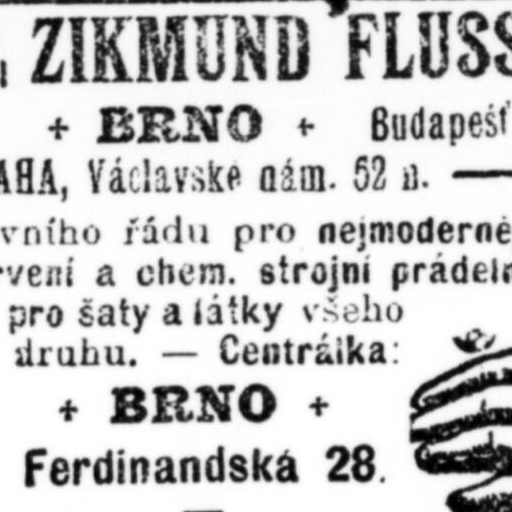

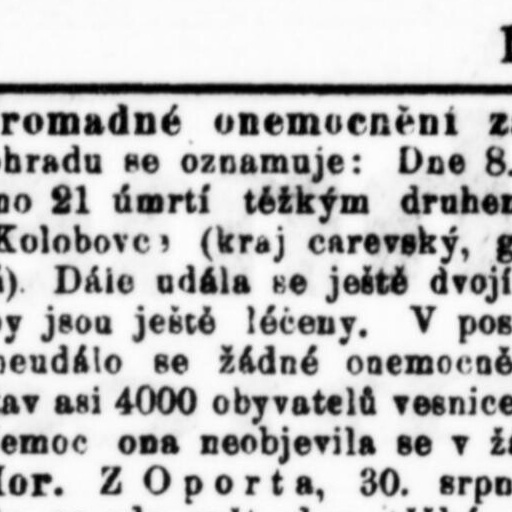

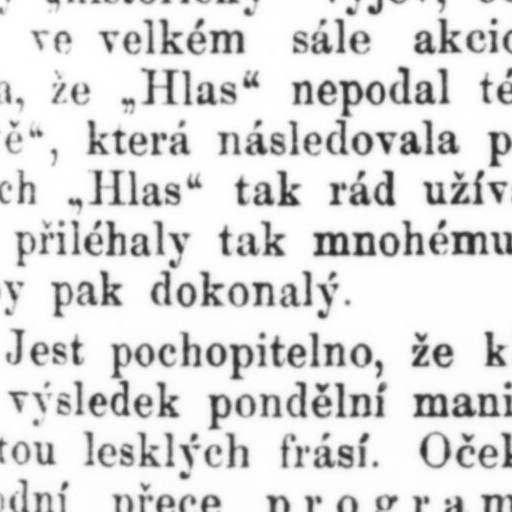

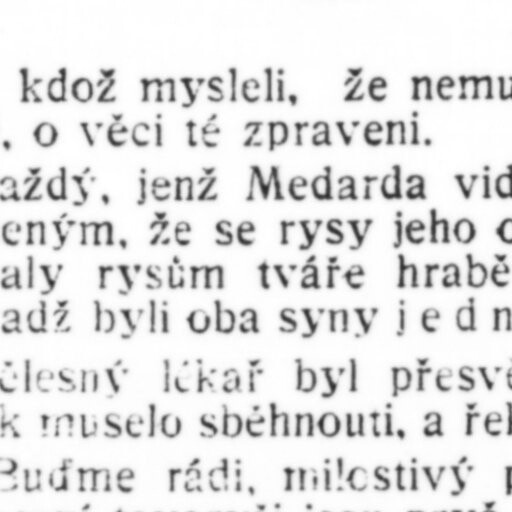

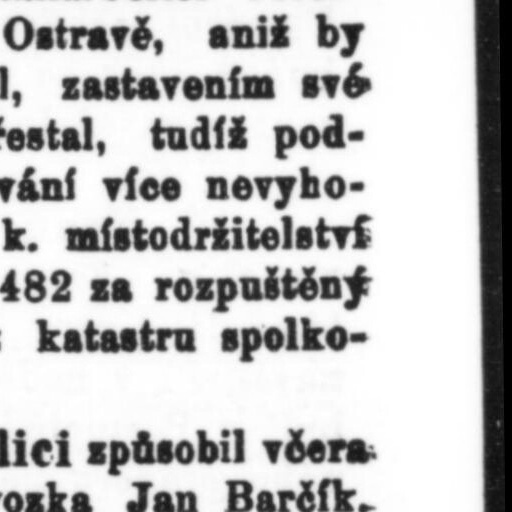

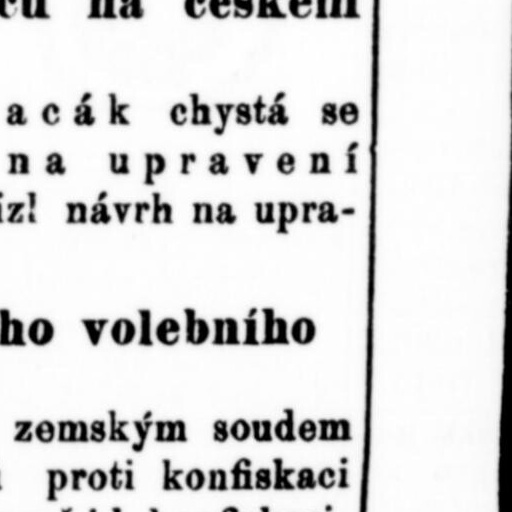

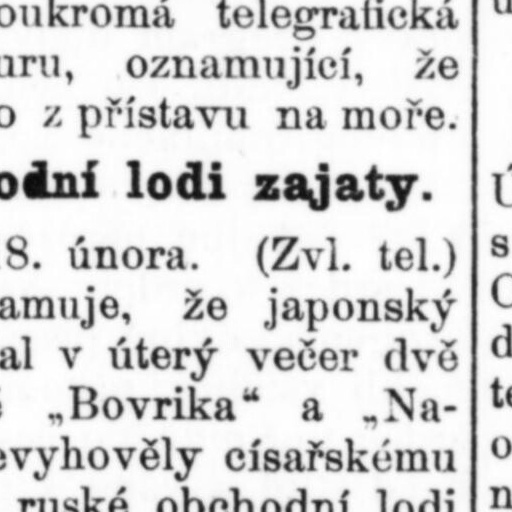

In [36]:
from IPython.display import Image


for i, item in enumerate(hundred):
    display(Image(filename='./app/static/crops/' + str(item) + '.jpg')) 
